# Experiment 1

### Include the common code notebook

In [116]:
%run CommonCodeForExperiments.ipynb

In [2]:
aitia = App()

In [3]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [10]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary 

In [163]:
def get_clustered_dataframe(incoming_df, column_list,  n_clusters, sample_size):
    gmm = mixture.GaussianMixture(n_components=n_clusters
                                         ).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

In [5]:
pc = pycausal()
pc.start_vm()

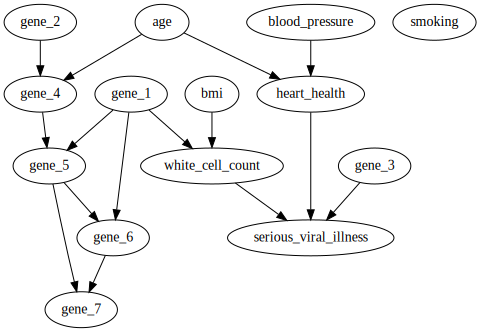

In [123]:
virus_scm = aitia.data.virus_scm()
virus_scm.cgm.draw()

In [7]:
target_graph_str = str(virus_scm.cgm.draw())

In [124]:
df = virus_scm.sample(2000)
df

,smoking,blood_pressure,gene_3,gene_2,gene_1,bmi,white_cell_count,age,heart_health,serious_viral_illness,gene_4,gene_5,gene_6,gene_7
0,-0.499501,0.450334,0.327742,-1.069083,1.269625,0.096634,-2.081208,1.005695,2.708859,-1.962618,-2.286890,2.415858,1.964852,-0.446779
1,-0.687726,-0.305018,-0.143879,-0.640807,0.372044,0.089315,-0.406033,1.071267,0.385067,-0.947903,-0.864360,2.207696,2.651321,-0.564002
2,1.433728,-1.350916,0.241658,0.382123,0.661997,-0.805868,-2.249352,0.278367,-0.207538,-2.758544,2.110754,3.042299,1.742332,0.269579
3,-1.056536,-0.736940,3.024535,1.336190,-0.051245,0.493314,0.517637,2.704584,2.428823,-2.225273,0.023652,-0.394289,-0.772642,-0.545689
4,0.027736,1.194549,2.993318,-0.180597,-1.944725,-1.451194,1.497559,-2.614716,-2.226747,-3.043522,3.330833,-0.910990,-2.233254,-0.771200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.472624,-0.709595,1.077017,0.575101,-0.004815,0.549052,1.495590,0.437774,0.003248,-0.699828,3.383751,2.098899,3.692482,-2.677124
1996,1.056363,-0.949156,0.259020,1.438669,-0.650177,0.645349,1.948881,-0.179345,-2.323159,1.781759,0.774634,-0.717792,-3.255661,3.976130
1997,-0.948221,0.055630,-0.901741,-1.350457,-0.081198,0.015877,-0.386089,0.214473,1.125109,0.678967,-3.819733,-2.344395,-3.041785,-0.174128
1998,0.185188,-1.106918,2.196301,-1.027326,-0.462842,-0.230574,1.430355,-0.968983,0.058487,-0.396497,0.669511,-2.245694,-1.948405,-1.962269


In [142]:
analysis_results, summary = run_causal_discovery(df, target_graph_str, algorithm_list, pc)
summary

,Algorithm,AUPR,SHD
0,PC,0.935884,2
1,FCI,0.935884,2
2,FGES-continuous,0.935884,2
3,GFCI-continuous,0.935884,2
4,RFCI-continuous,0.935884,2


In [158]:
df_confd = df.drop(['white_cell_count', 'heart_health'], axis=1)

In [144]:
analysis_results_confd, summary_confd = run_causal_discovery(df_confd, target_graph_str, algorithm_list, pc)
summary_confd

,Algorithm,AUPR,SHD
0,PC,0.690306,9
1,FCI,0.690306,9
2,FGES-continuous,0.661460,10
3,GFCI-continuous,0.661460,10
4,RFCI-continuous,0.690306,9


In [152]:
min_clusters = 2
max_clusters = 20

In [153]:
n_clusters = np.arange(min_clusters, max_clusters)
iterations = max_clusters
column_list = list(df_confd)
all_results = []
for n in n_clusters:
    clustered_df = get_clustered_dataframe(df_confd, column_list, n, 2000)
    _, summary_confd = run_causal_discovery(clustered_df, target_graph_str, algorithm_list, pc)
    cluster_results = []
    for index, row in summary_confd.iterrows():
        one_result = dict()
        one_result['n_clusters'] = n
        one_result['algorithm'] = row['Algorithm']
        one_result['AUPR'] = row['AUPR']
        one_result['SHD'] = row['SHD']
        cluster_results.append(one_result)
    #print(cluster_results)
    for r in cluster_results:
        all_results.append(r)
        
#all_results
df_results = pd.DataFrame(all_results)

In [154]:
df_results

,n_clusters,algorithm,AUPR,SHD
0,2,PC,0.66146,10
1,2,FCI,0.66146,10
2,2,FGES-continuous,0.66146,10
3,2,GFCI-continuous,0.66146,10
4,2,RFCI-continuous,0.66146,10
...,...,...,...,...
85,19,PC,0.66146,10
86,19,FCI,0.66146,10
87,19,FGES-continuous,0.66146,10
88,19,GFCI-continuous,0.66146,10


In [155]:
all_means = []
for n in n_clusters:
    df_query = df_results.query('n_clusters == ' + str(n))
    one_mean = dict()
    one_mean['n_clusters'] = n
    one_mean['AUPR'] = df_query.mean(axis=0)[1]
    one_mean['SHD'] = df_query.mean(axis=0)[2]
    all_means.append(one_mean)

df_means = pd.DataFrame(all_means)
df_means

,n_clusters,AUPR,SHD
0,2,0.661460,10.0
1,3,0.671556,9.8
2,4,0.667229,9.8
3,5,0.665787,10.0
4,6,0.669537,9.8
5,7,0.637284,11.2
6,8,0.656709,10.4
7,9,0.656515,10.2
8,10,0.675306,9.6
9,11,0.665787,10.0


In [161]:
n_components = np.arange(2, 20)
models = [mixture.BayesianGaussianMixture(n, covariance_type='full', random_state=0).fit(df_confd)
          for n in n_components]

plt.plot(n_components, [m.bic(df_confd) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_confd) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

AttributeError: 'BayesianGaussianMixture' object has no attribute 'bic'

In [145]:
bics, bics_err = get_bic_scores(min_clusters, max_clusters, df_confd)

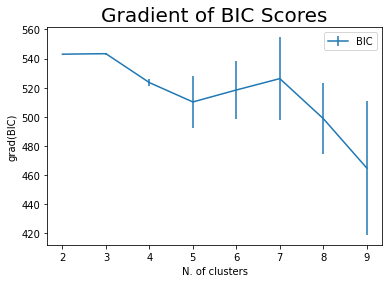

In [151]:
plot_bic_gradient(bics, bics_err, min_clusters, max_clusters)

In [140]:
bics

[68099.96031765896,
 68582.24569904295,
 69058.64528446952,
 69490.38663208854,
 69930.01345342014,
 70412.73759376392,
 70879.50803198421,
 71254.20635396968]

In [141]:
bics_err

[0.0,
 6.1376500972702015,
 4.129559984276202,
 32.52902555475048,
 27.230688808507818,
 22.347045858769942,
 32.266479119324316,
 55.11206583829535]

In [135]:
tt_results, tt_res_sigs = get_train_test_distance(min_clusters, max_clusters, df_confd)

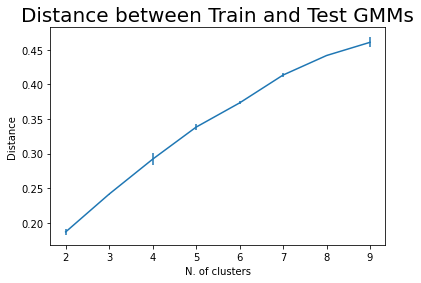

In [136]:
plot_train_test_distance(tt_results, tt_res_sigs, min_clusters, max_clusters)

In [137]:
sils, sils_err = get_silhouette_coefficient(min_clusters, max_clusters, df_confd)

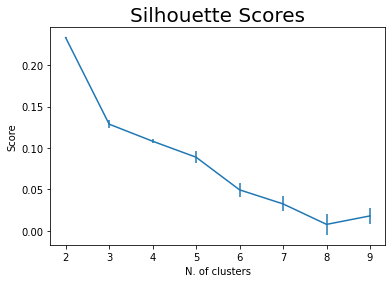

In [139]:
plot_silhouette_coefficient(sils, sils_err, min_clusters, max_clusters)

In [113]:
column_list = list(df2)
clustered_df = get_clustered_dataframe(df2, column_list, 2, 2000)

In [114]:
clustered_df

,smoking,blood_pressure,gene_3,gene_2,gene_1,bmi,age,serious_viral_illness,gene_4,gene_5,gene_6,gene_7
0,-0.893796,-0.573437,-2.207184,-0.344966,0.302944,-1.087053,0.656235,1.321112,-1.057376,-0.963232,-2.415388,0.363736
1,1.628964,-2.221658,-0.357635,-0.445873,0.645223,-0.649863,-1.677620,-3.146163,0.968273,1.329548,2.082275,0.049611
2,0.127227,0.036242,0.471470,0.247902,-0.558809,-1.258508,0.884981,-0.782272,-1.703845,-0.898981,-0.741481,0.606134
3,1.081085,2.433850,0.752081,0.100759,-1.833376,0.344762,1.367275,0.505519,0.155286,-1.898017,-2.777936,1.767560
4,-1.224027,1.662453,1.604708,0.166306,-0.250537,-0.224392,-0.626996,-0.515094,1.446884,0.572088,0.428187,0.691800
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.000103,-0.160020,0.496153,0.049052,0.560628,-0.717246,-0.011540,-0.022303,-0.332531,1.431596,1.590142,0.402458
1996,-0.054882,-0.854813,-0.674557,-0.397722,0.250389,-1.153798,0.789557,-1.289553,-0.530205,-0.366434,0.883564,-1.892646
1997,1.345841,-1.203810,0.465437,-0.251739,-0.318034,-0.712793,-0.749213,-1.928320,1.241811,-1.336729,0.142552,-0.475338
1998,0.258805,-0.347515,-0.252372,-0.209652,-0.766958,1.518216,0.008314,1.286668,-0.365767,-1.582929,-1.259038,-0.053128


In [115]:
analysis_results_clustered, summary_clustered = aitia.run_analysis(clustered_df, 
                                                target_graph_str=target_graph_str, 
                                                algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                ],
                                                pc=pc)
summary_clustered

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.724397,8
1,FCI,False,0.724397,8
2,FGES-continuous,False,0.690306,9
3,GFCI-continuous,False,0.690306,9
4,RFCI-continuous,False,0.724397,8


In [90]:
gmm = mixture.BayesianGaussianMixture(n_components=3).fit(df2)
clustered_data2 = gmm.sample(2000)
clustered_df2 = pd.DataFrame(clustered_data2[0], columns=list(df2))
analysis_results_clustered2, summary_clustered2 = aitia.run_analysis(clustered_df2, 
                                                target_graph_str=target_graph_str, 
                                                algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                ],
                                                pc=pc)
summary_clustered2

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.661460,10
1,FCI,False,0.661460,10
2,FGES-continuous,False,0.615306,12
3,GFCI-continuous,False,0.615306,12
4,RFCI-continuous,False,0.661460,10


In [91]:
gmm = mixture.BayesianGaussianMixture(n_components=4).fit(df2)
clustered_data3 = gmm.sample(2000)
clustered_df3 = pd.DataFrame(clustered_data3[0], columns=list(df2))
analysis_results_clustered3, summary_clustered3 = aitia.run_analysis(clustered_df3, 
                                                  target_graph_str=target_graph_str, 
                                                  algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                  ],
                                                  pc=pc)
summary_clustered3

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.690306,9
1,FCI,False,0.690306,9
2,FGES-continuous,False,0.636735,11
3,GFCI-continuous,False,0.690306,9
4,RFCI-continuous,False,0.690306,9


In [92]:
summary.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.922619
SHD                      2.400000
dtype: float64

In [93]:
summary_clustered.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.673823
SHD                      9.600000
dtype: float64

In [94]:
summary_clustered2.mean(axis=0)

Isomorphic to Target?     0.000000
AURC                      0.642998
SHD                      10.800000
dtype: float64

In [95]:
summary_clustered3.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.679592
SHD                      9.400000
dtype: float64